# Regrid testing

Testing and evaluating the efficacy of the regrid process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.constants as c
import os

In [2]:
osm_dir = "yuxiang1_osm"

fits_files = np.array(os.listdir(osm_dir))
sort_type = [('file', 'O'), ('num', int)]
sort_prep = lambda x: (x, int(x.split('.')[1].split("_")[0]))
fits_files, _ = zip(*np.sort(np.array(list(map(sort_prep, fits_files)), dtype=sort_type), order="num"))

dfs = []

for file in fits_files:
    dfs.append(pd.read_csv(osm_dir+"/"+file, delimiter=" ", skiprows=3, index_col=False, names=["RA", "Dec", "Stokes I", "Q", "U", "V", "Freq0"]))

In [3]:
print(dfs[0])
print(dfs[1])
print(dfs[399])

                RA       Dec  Stokes I    Q    U    V        Freq0
0       359.680569 -0.319431  0.000420  0.0  0.0  0.0  198783000.0
1       359.680569 -0.317822  0.000000  0.0  0.0  0.0  198783000.0
2       359.680569 -0.316213  0.000387  0.0  0.0  0.0  198783000.0
3       359.680569 -0.314603  0.000000  0.0  0.0  0.0  198783000.0
4       359.680569 -0.312994  0.000000  0.0  0.0  0.0  198783000.0
...            ...       ...       ...  ...  ...  ...          ...
159995    0.322649  0.316213  0.000000  0.0  0.0  0.0  198783000.0
159996    0.322649  0.317822  0.000269  0.0  0.0  0.0  198783000.0
159997    0.322649  0.319431  0.000000  0.0  0.0  0.0  198783000.0
159998    0.322649  0.321040  0.003230  0.0  0.0  0.0  198783000.0
159999    0.322649  0.322649  0.000000  0.0  0.0  0.0  198783000.0

[160000 rows x 7 columns]
                RA       Dec      Stokes I    Q    U    V        Freq0
0       359.680569 -0.319431  6.751600e-04  0.0  0.0  0.0  198683000.0
1       359.680569 -0.31782

In [4]:
out_means = []
out_medians = []
out_maxes = []

for df in dfs:
    out_means.append(np.mean(df['Stokes I']))
    out_medians.append(np.median(df['Stokes I']))
    out_maxes.append(np.max(df['Stokes I']))

out_means = np.array(out_means[1:])
out_medians = np.array(out_medians[1:])
out_maxes = np.array(out_maxes[1:])

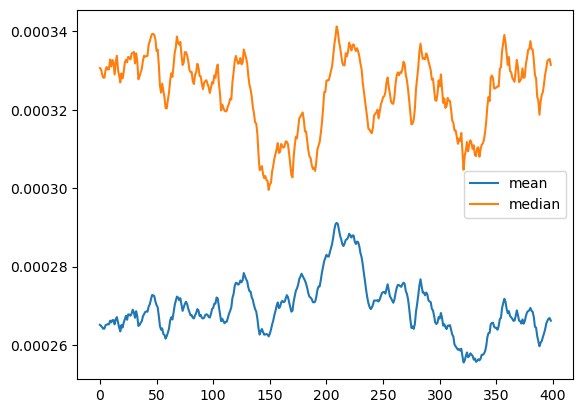

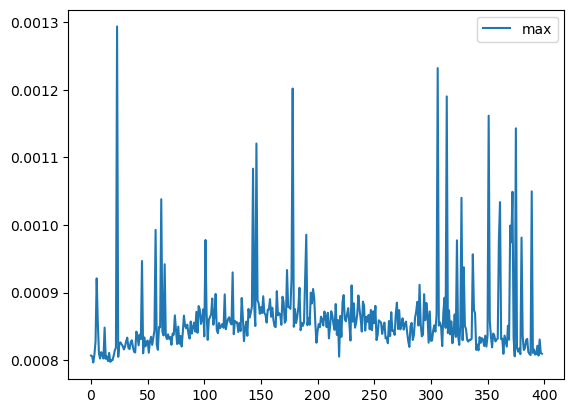

In [5]:
plt.plot(out_means, label="mean")
plt.plot(out_medians, label="median")
plt.legend()
plt.show()

plt.plot(out_maxes, label="max")
plt.legend()
plt.show()

## Testing Yuxiang's box

In [6]:
import h5py

f1 = h5py.File('yuxiang_bts/yuxiang1.h5', 'r')
data1 = np.array(f1.get('BrightnessTemp')['brightness_temp'])

In [7]:
T_max = np.max(data1)
print(T_max)

37.33767


In [8]:
print(dfs[0]['Freq0'][0])

RAs = np.array(dfs[0]['RA'])
print(RAs < 180)

max_RA = np.max(RAs, where=(RAs < 180), initial=0)
min_RA = np.min(RAs, where=(RAs > 180), initial=360) - 360

print(max_RA, min_RA)

square_size = (np.pi/180) * (max_RA - min_RA) / 400

print(square_size)

L_max = 2e26 * c.k_B.value * (dfs[0]['Freq0'][0] ** 2) * T_max * (square_size ** 2) / (c.c.value ** 2)
print(L_max * 1e5)

198783000.0
[False False False ...  True  True  True]
0.322649 -0.3194310000000087
2.8016025153013357e-05
3.557874270046575


In [9]:
median_arr = []
mean_arr = []
max_arr = []

for t in range(data1.shape[2]):
    channel = data1[:, :, t]
    median_arr.append(np.median(channel))
    mean_arr.append(np.mean(channel))
    max_arr.append(np.max(channel))

median_arr = np.array(median_arr)
mean_arr = np.array(mean_arr)
max_arr = np.array(max_arr)

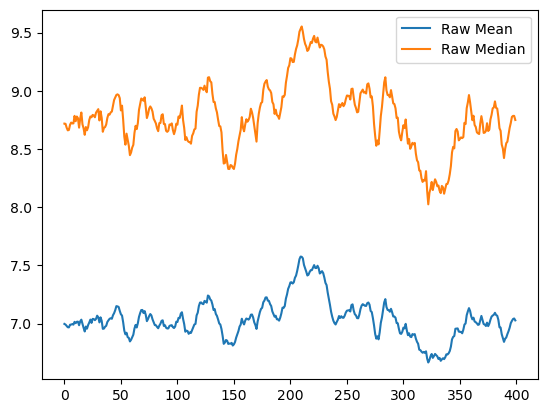

In [10]:
plt.plot(mean_arr, label="Raw Mean")
plt.plot(median_arr, label="Raw Median")
plt.legend()
plt.show()

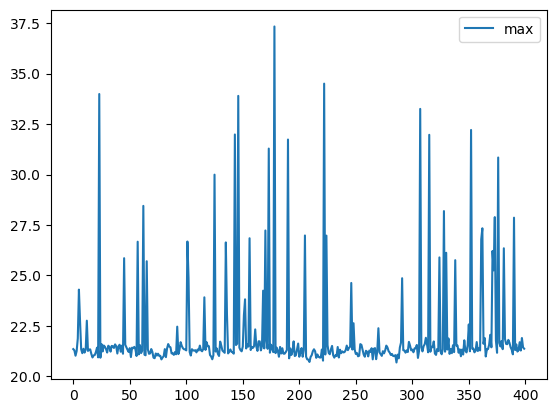

In [11]:
plt.plot(max_arr, label="max")
plt.legend()
plt.show()

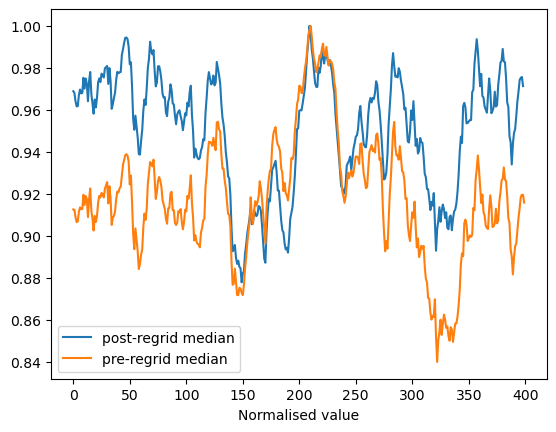

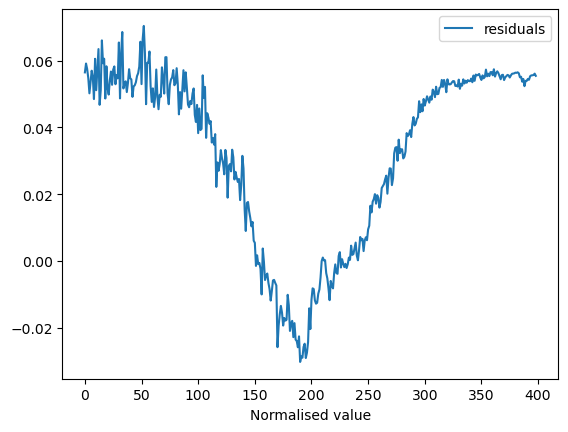

In [13]:
plt.plot(out_medians/np.max(out_medians), label="post-regrid median")
plt.plot(median_arr/np.max(median_arr), label="pre-regrid median")
plt.xlabel("Normalised value")
plt.legend()
plt.show()

plt.plot(out_medians/np.max(out_medians) - (median_arr/np.max(median_arr))[1:], label="residuals")
plt.xlabel("Normalised value")
plt.legend()
plt.show()

In [4]:
from astropy.coordinates import SkyCoord
import astropy.units as u

phase_ref_point = SkyCoord(ra=0*u.rad, dec=0*u.rad, frame='icrs')

phase_ref_point.dec.value

0.0